In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from terminal_optimization import objects
from terminal_optimization import defaults
from terminal_optimization import system

# 0. Prepare inputs

In [2]:
startyear = 2018
lifecycle = 20

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2023:
        demand.append(750_000)
    else:
        demand.append(1_600_000)

scenario_data={'year': years, 'volume': demand}

# instantiate a commodity object
maize = objects.Commodity(**defaults.maize_data)
maize.handysize_perc = 0
maize.handymax_perc = 100
maize.panamax_perc = 0
maize.handling_fee = 9.8 # example Wijnand

wheat = objects.Commodity(**defaults.wheat_data)
soybeans = objects.Commodity(**defaults.soybean_data)

maize.scenario_data = pd.DataFrame(data=scenario_data)
maize.historic_data = []
wheat.scenario_data = []
wheat.historic_data = []
soybeans.scenario_data = []
soybeans.historic_data = []

demand = [maize, wheat, soybeans]

# plot scenarios 
if False:
    maize.plot_demand()
    wheat.plot_demand()
    soybeans.plot_demand()

## 0.2 Generate vessels

In [4]:
# instantiate vessels
handysize = objects.Vessel(**defaults.handysize_data)
handymax = objects.Vessel(**defaults.handymax_data)
panamax = objects.Vessel(**defaults.panamax_data)

vessels = [handysize, handymax, panamax] 

# 1. Instatiate terminal system

In [5]:
Terminal = system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 5840,   # example Wijnand
                         debug=True,
                         crane_type_defaults=defaults.mobile_crane_data, 
                         storage_type_defaults=defaults.silo_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [6]:
Terminal.simulate()


Simulate year: 2018
  Total vessel calls: 15
     Handysize calls: 0
     Handymax calls: 15
     Panamax calls: 0
  Total cargo volume: 750000
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
2018
0
15
0
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
  *** add Berth to elements
     Berth occupancy planned (after adding berth): inf
     Berth occupancy online (after adding berth): inf
  *** add Quay to elements
     Berth occupancy planned (after adding quay): inf
     Berth occupancy online (after adding quay): inf
  *** add Harbour crane to elements
     Berth occupancy planned (

  Total cargo volume: 1600000
     a total of 2 Berth_01 is online; 2 total planned
     a total of 2 Quay_01 is online; 2 total planned
     a total of 5 Mobile_crane_01 is online; 5 total planned
     a total of 0 [] is online; 0 total planned
     a total of 6 Quay_conveyor_01 is online; 6 total planned
     a total of 18 Silo_01 is online; 18 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
2030
0
32
0
     Berth occupancy planned (@ start of year): 0.3465258293447764
     Berth occupancy online (@ start of year): 0.3465258293447764
  Revenues (demand): 15680000.000000002
  Revenues (throughput): 16460864
a total of 2400 ton of quay_conveyor conveyor service capacity is online; 2400 ton total planned
a total of 2400 ton of conveyor quay service capacity is online; 2400 ton total planned
a total of 90000 ton of silo storage capacity is online; 90000 ton total planned

Simulate year: 2031
  Total vessel c

## Report all elements

In [7]:
if True: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)


Maize

{'historic_data': [], 'scenario_data':     year   volume
0   2018   750000
1   2019   750000
2   2020   750000
3   2021   750000
4   2022   750000
5   2023  1600000
6   2024  1600000
7   2025  1600000
8   2026  1600000
9   2027  1600000
10  2028  1600000
11  2029  1600000
12  2030  1600000
13  2031  1600000
14  2032  1600000
15  2033  1600000
16  2034  1600000
17  2035  1600000
18  2036  1600000
19  2037  1600000, 'handling_fee': 9.8, 'handysize_perc': 0, 'handymax_perc': 100, 'panamax_perc': 0, 'name': 'Maize', 'id': '8c191378-5198-11e9-a926-60f677ba2ce0'}

Wheat

{'historic_data': [], 'scenario_data': [], 'handling_fee': 9.8, 'handysize_perc': 0, 'handymax_perc': 0, 'panamax_perc': 100, 'name': 'Wheat', 'id': '8c191379-5198-11e9-91cf-60f677ba2ce0'}

Soybeans

{'historic_data': [], 'scenario_data': [], 'handling_fee': 9.8, 'handysize_perc': 50, 'handymax_perc': 50, 'panamax_perc': 0, 'name': 'Soybeans', 'id': '8c19137a-5198-11e9-b76b-60f677ba2ce0'}

Handysize_1

{'type': 'Hand

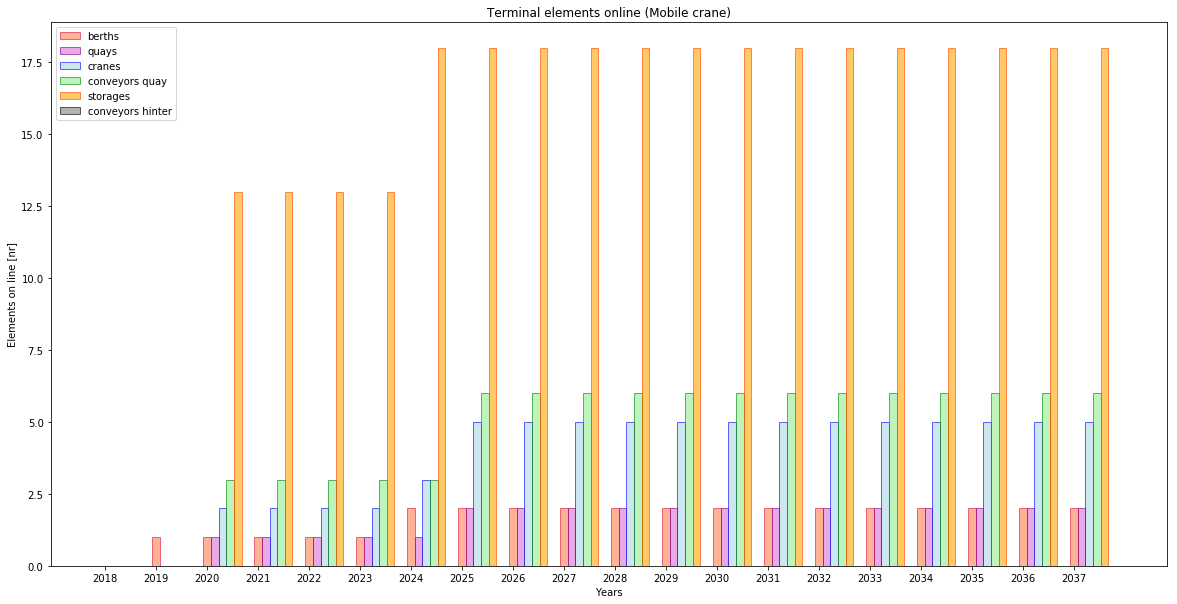

In [8]:
Terminal.terminal_elements_plot()

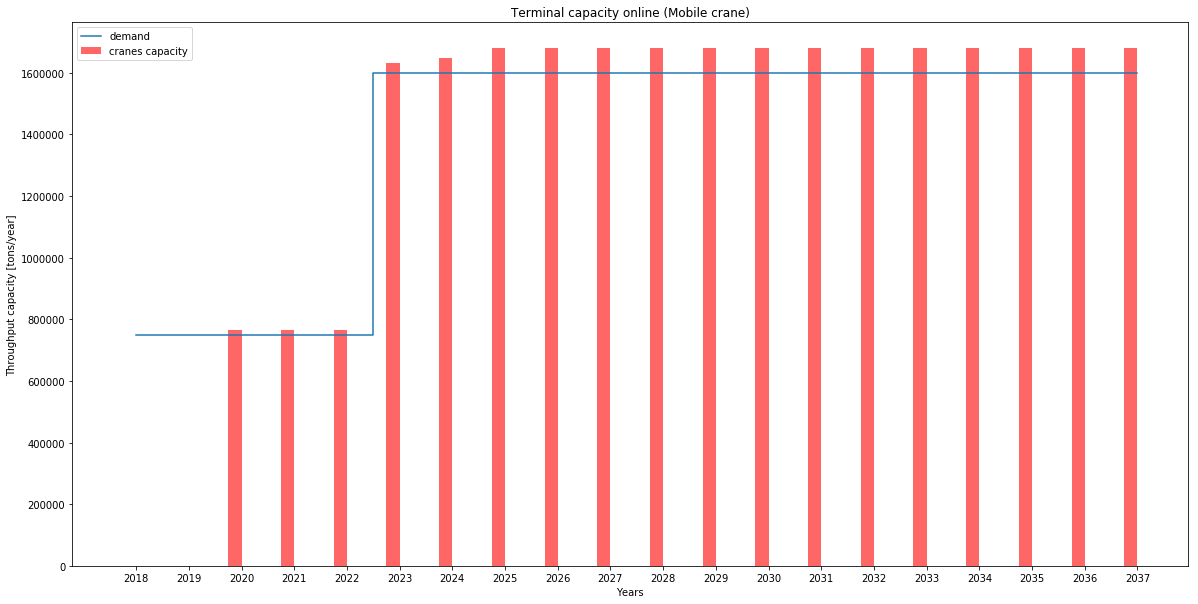

In [9]:
Terminal.terminal_capacity_plot()

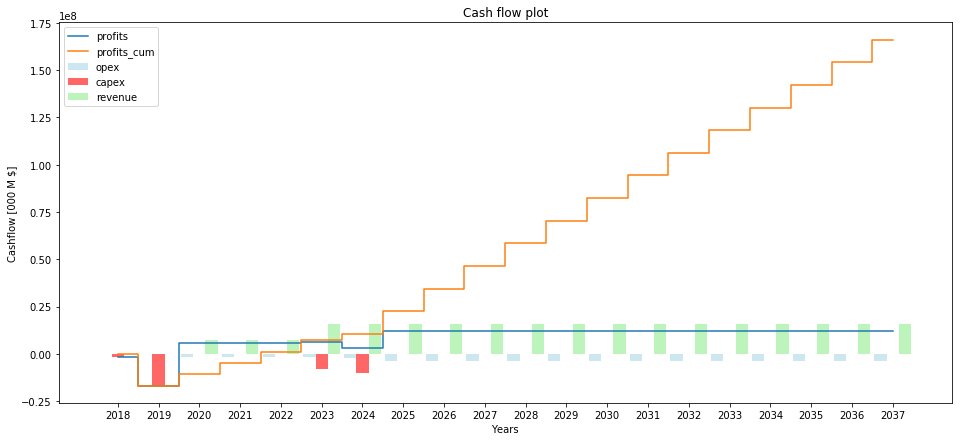

In [10]:
Terminal.cashflow_plot()

## SandBox

In [11]:
Terminal.NPV()

PV: [ -1602528.         -16745852.           5874474.07692308
   5874474.07692308   5874474.07692308   6284347.87692308
   3281141.37562558  11977067.93905468  11977067.93905468
  11977067.93905468  11977067.93905468  11977067.93905468
  11977067.93905468  11977067.93905468  11977067.93905468
  11977067.93905468  11977067.93905468  11977067.93905468
  11977067.93905468  11977067.93905468]
NPV: 164542414.69102877
